# Importing required libraries and dataset

In [ ]:
# Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import os
import pickle
import librosa
import librosa.display
import IPython.display as ipd
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential

In [ ]:
# Reading the csv file
df = pd.read_csv("/content/features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


# Understanding Audio signals and Dataset

In [ ]:
# Loading a sample audio of "classical" genre
audio_classical ="/content/classical.00000.wav"
data_classical,sr=librosa.load(audio_classical)

In [ ]:
data_classical

array([-0.02008057, -0.01748657,  0.00418091, ...,  0.01934814,
        0.027771  ,  0.03131104], dtype=float32)

In [ ]:
print(type(data_classical))

<class 'numpy.ndarray'>


In [ ]:
# Loading a sample audio of "rock" genre
audio_rock ="/content/rock.00000.wav"
data_rock,sr=librosa.load(audio_rock)
print(type(data_rock),type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
data_rock

array([-0.03344727, -0.05490112, -0.05435181, ..., -0.08416748,
        0.02886963,  0.1296997 ], dtype=float32)

In [ ]:
# Playing Classical audio file
import IPython
IPython.display.Audio(data_classical,rate=sr)

In [ ]:
# Playing Rock audio file
import IPython
IPython.display.Audio(data_rock,rate=sr)

---
Waveforms of the audio files

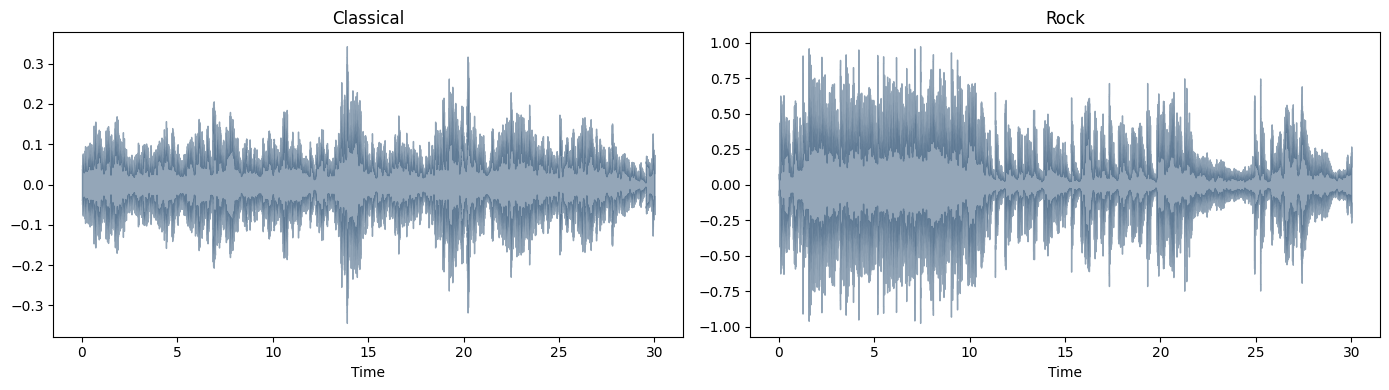

In [ ]:
# Wave form of the audio
plt.figure(figsize=(14, 4))

# Plot waveform for classical
plt.subplot(1, 2, 1)
librosa.display.waveshow(data_classical, color="#2B4F72", alpha=0.5)
plt.title("Classical")

# Plot waveform for rock
plt.subplot(1, 2, 2)
librosa.display.waveshow(data_rock, color="#2B4F72", alpha=0.5)
plt.title("Rock")

plt.tight_layout()
plt.show()

---
Mel spectogram of audio files



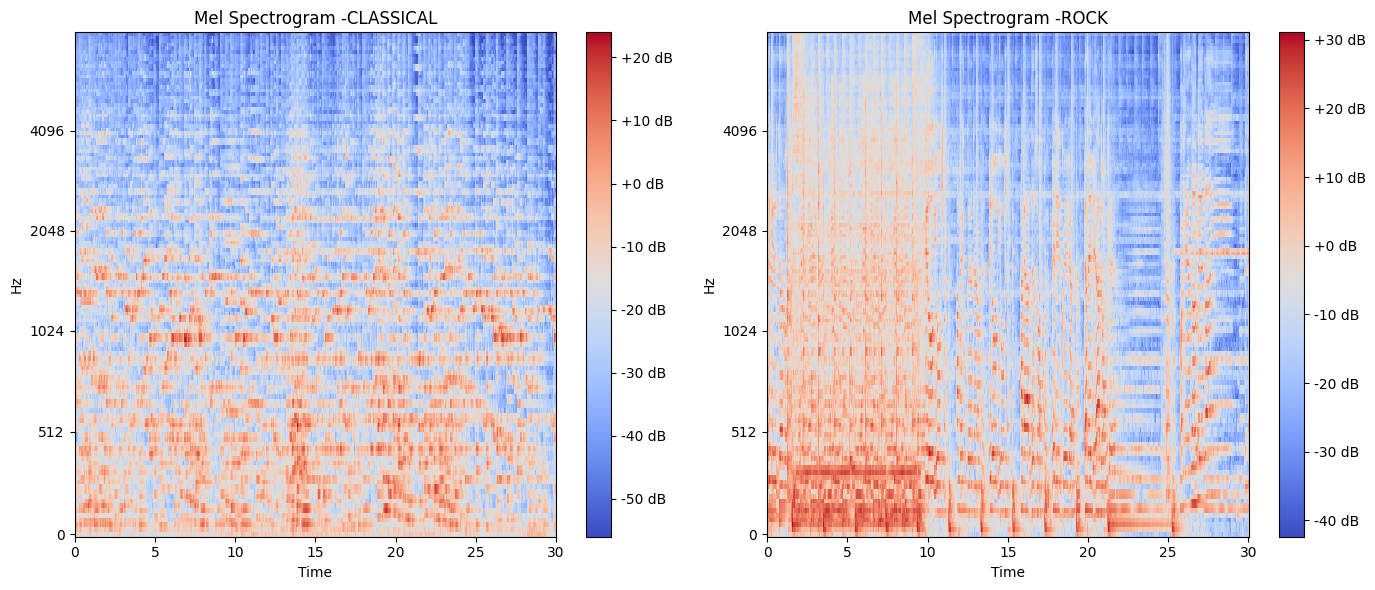

In [ ]:
# stft_classical = librosa.stft(data_classical)
# stft_db_classical = librosa.amplitude_to_db(abs(stft_classical))

# stft_rock = librosa.stft(data_rock)
# stft_db_rock = librosa.amplitude_to_db(abs(stft_rock))

#Plotting
plt.figure(figsize=(14, 6))

# Classical spectrogram
plt.subplot(1, 2, 1)
spectrogram = librosa.feature.melspectrogram(y=data_classical, sr=sr, n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram -CLASSICAL')
plt.colorbar(format='%+2.0f dB');

# Rock spectrogram
plt.subplot(1, 2, 2)
spectrogram = librosa.feature.melspectrogram(y=data_rock, sr=sr, n_mels=128,fmax=8000)
spectrogram = librosa.power_to_db(spectrogram)
librosa.display.specshow(spectrogram, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram -ROCK')
plt.colorbar(format='%+2.0f dB');

plt.tight_layout()
plt.show()



---
Chroma features of audio files

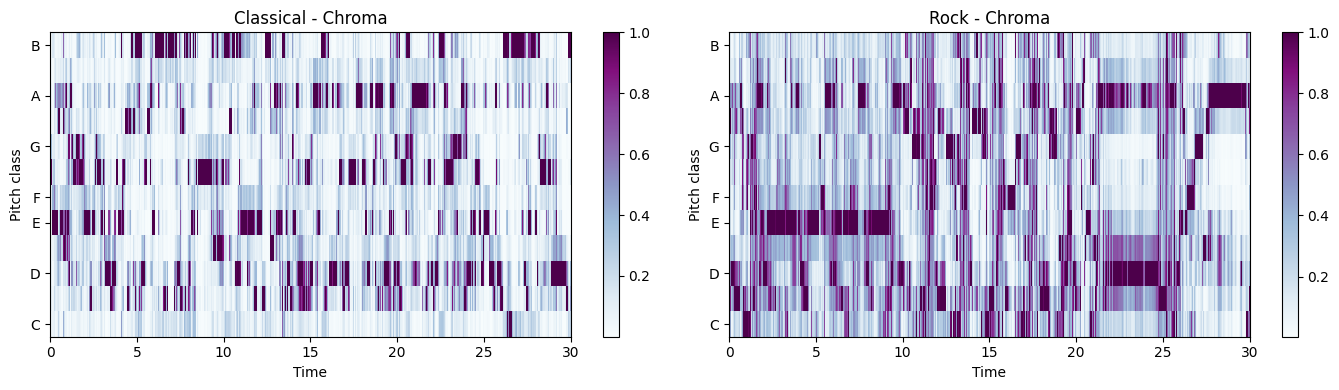

In [ ]:
# Compute chroma features
chroma_classical = librosa.feature.chroma_stft(y=data_classical, sr=sr)
chroma_rock = librosa.feature.chroma_stft(y=data_rock, sr=sr)

fig, axs = plt.subplots(1, 2, figsize=(14, 4))

# Classical
img1 = librosa.display.specshow(chroma_classical, sr=sr, x_axis="time", y_axis="chroma", cmap="BuPu", ax=axs[0])
axs[0].set_title("Classical - Chroma")
fig.colorbar(img1, ax=axs[0])

# Rock
img2 = librosa.display.specshow(chroma_rock, sr=sr, x_axis="time", y_axis="chroma", cmap="BuPu", ax=axs[1])
axs[1].set_title("Rock - Chroma")
fig.colorbar(img2, ax=axs[1])

plt.tight_layout()
plt.show()


# Data processing

In [ ]:
df.isnull().sum()

,0
filename,0
length,0
chroma_stft_mean,0
chroma_stft_var,0
rms_mean,0
rms_var,0
spectral_centroid_mean,0
spectral_centroid_var,0
spectral_bandwidth_mean,0
spectral_bandwidth_var,0



*=> no null values found in the dataset.*


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 9990 non-null   object 
 1   length                   9990 non-null   int64  
 2   chroma_stft_mean         9990 non-null   float64
 3   chroma_stft_var          9990 non-null   float64
 4   rms_mean                 9990 non-null   float64
 5   rms_var                  9990 non-null   float64
 6   spectral_centroid_mean   9990 non-null   float64
 7   spectral_centroid_var    9990 non-null   float64
 8   spectral_bandwidth_mean  9990 non-null   float64
 9   spectral_bandwidth_var   9990 non-null   float64
 10  rolloff_mean             9990 non-null   float64
 11  rolloff_var              9990 non-null   float64
 12  zero_crossing_rate_mean  9990 non-null   float64
 13  zero_crossing_rate_var   9990 non-null   float64
 14  harmony_mean            

In [ ]:
tmp = df.groupby('label').agg({
    'length':['mean'],
    'tempo':['mean'],
    'chroma_stft_mean':['mean'],
    'rms_mean':['mean'],
    'spectral_bandwidth_mean':['mean'],
    'rolloff_mean':['mean'],
    'zero_crossing_rate_mean':['mean'],
    'harmony_mean':['mean'],
    'perceptr_mean':['mean'],
})
tmp

,length,tempo,chroma_stft_mean,rms_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmony_mean,perceptr_mean
,mean,mean,mean,mean,mean,mean,mean,mean,mean
label,,,,,,,,,
blues,66149.0,126.690664,0.342438,0.136025,1930.849650,3632.913078,0.078189,-0.000455,-0.000565
classical,66149.0,125.888882,0.264508,0.042812,1519.531577,2475.817622,0.076774,-0.000245,-0.000180
country,66149.0,121.095174,0.344996,0.125690,2096.407344,3938.471613,0.082456,-0.000014,-0.000125
disco,66149.0,122.734182,0.416377,0.136209,2512.355778,5514.648263,0.128081,-0.000253,-0.000141
hiphop,66149.0,125.938210,0.454590,0.178219,2512.284466,5327.690463,0.106923,-0.000183,-0.000497
jazz,66149.0,122.972381,0.297520,0.086641,2019.764282,3744.724733,0.076210,-0.000727,-0.000430
metal,66149.0,124.987786,0.480162,0.153454,2242.819811,5123.753216,0.146033,-0.000569,-0.000991
pop,66149.0,123.140297,0.398089,0.199640,3006.802982,6647.631499,0.132269,0.000012,-0.000002


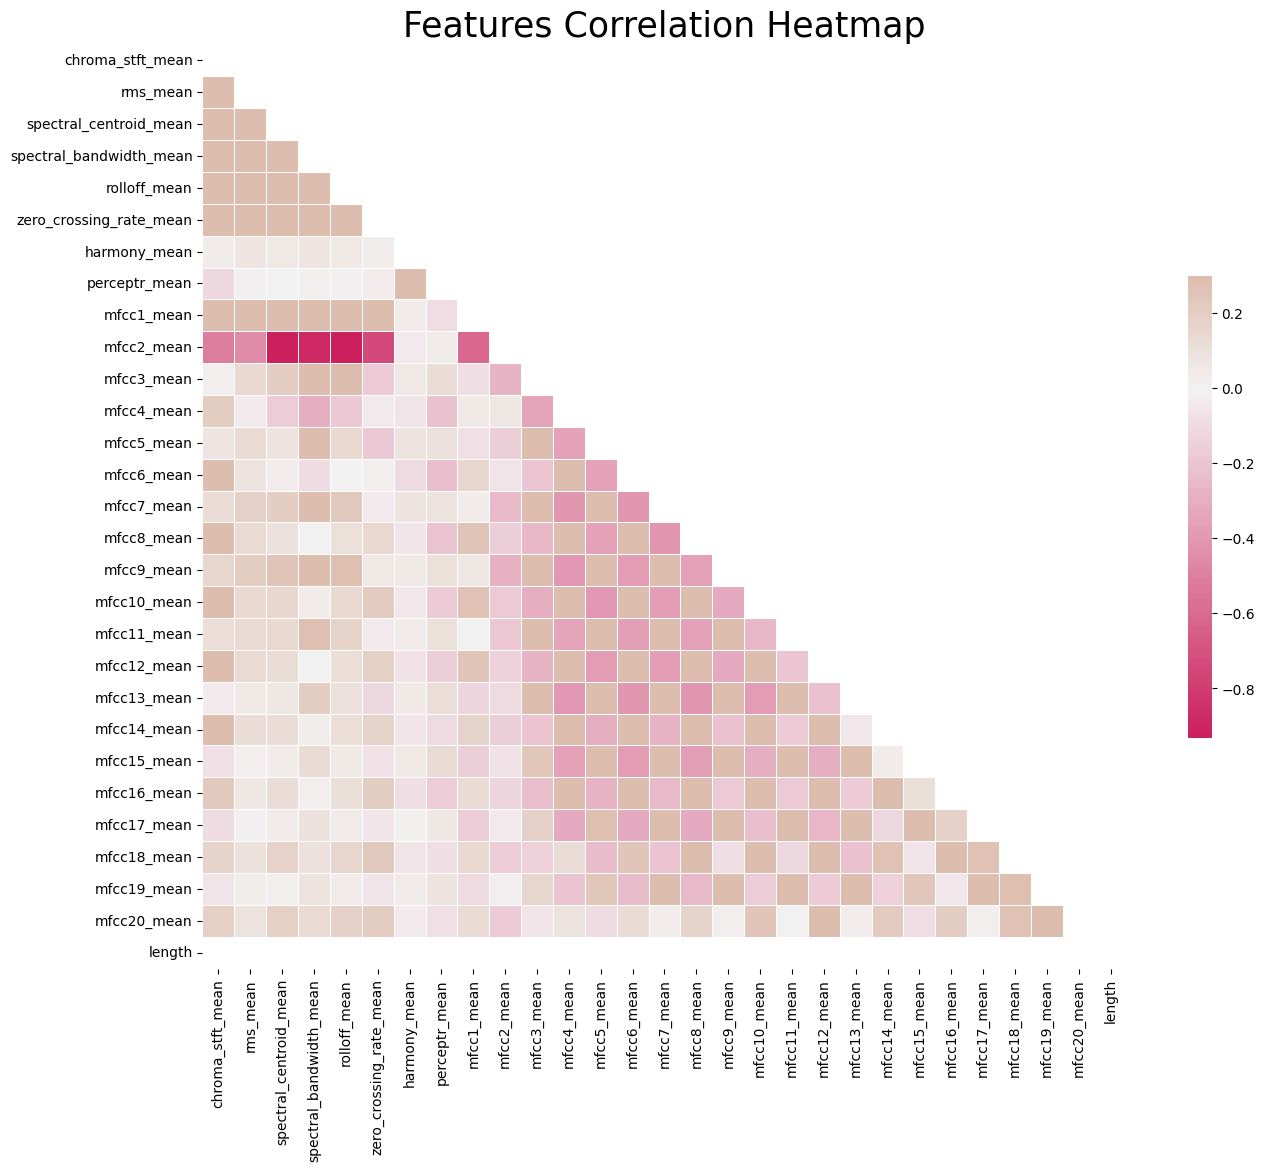

In [ ]:
mean_cols = [col for col in df.columns if 'mean' in col]
tmp = mean_cols + ['length']
corr = df[tmp].corr()

# visualize correlation heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Features Correlation Heatmap', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

*=> Based on the correlation map there is no need of feature reduction.*



---





---
**Label encoding**




In [ ]:
# Blues - 0
# Classical - 1
# Country - 2
# Disco - 3
# Hip-hop - 4
# Jazz - 5
# Metal - 6
# Pop - 7
# Reggae - 8
# Rock - 9

class_encod=df.iloc[:,-1]
converter=LabelEncoder()
y=converter.fit_transform(class_encod)
y

array([0, 0, 0, ..., 9, 9, 9])

In [ ]:
# Drop the column filename as it is no longer required for training
df=df.drop(labels=["filename", "length"], axis=1)

In [ ]:
X = np.array(df.iloc[:, :-1], dtype=float)

**Train-test splitting of data**

In [ ]:
# splitting 80% data into training set and the remaining 20% to test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7992, 57)
(1998, 57)


In [ ]:
unique_values, counts = np.unique(y_train, return_counts=True)
print("Distribution of train data across different genres:\n")
for value, count in zip(unique_values, counts):
    print(f"Genre: {value}, Count: {count}")

Distribution of train data across different genres:

Genre: 0, Count: 799
Genre: 1, Count: 818
Genre: 2, Count: 789
Genre: 3, Count: 783
Genre: 4, Count: 812
Genre: 5, Count: 786
Genre: 6, Count: 802
Genre: 7, Count: 797
Genre: 8, Count: 802
Genre: 9, Count: 804


In [ ]:
unique_values, counts = np.unique(y_test, return_counts=True)
print("Distribution of test data across different genres:\n")
for value, count in zip(unique_values, counts):
    print(f"Genre: {value}, Count: {count}")

Distribution of test data across different genres:

Genre: 0, Count: 201
Genre: 1, Count: 180
Genre: 2, Count: 208
Genre: 3, Count: 216
Genre: 4, Count: 186
Genre: 5, Count: 214
Genre: 6, Count: 198
Genre: 7, Count: 203
Genre: 8, Count: 198
Genre: 9, Count: 194




**Data Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X_train = fit.fit_transform(X_train)
X_test = fit.transform(X_test)

# Model selection

## Using machine learning models

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
def model_evaluation(model, X_train, X_test, desc):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(desc)
    print("\nTest set score: {:.3f}\n".format(model.score(X_test, y_test)))
    print(classification_report(y_test, y_pred, target_names=converter.classes_, zero_division=0.0, digits=3))
    print("\n---------------------------------------------------------------------------------------------------------------------------\n")
    return y_pred

In [ ]:
# evaluate basic classifier model

model = RandomForestClassifier()
model_evaluation(model, X_train, X_test, 'RFC Evaluation')

model = SVC()
model_evaluation(model, X_train, X_test, 'SVC Evaluation')

model = DecisionTreeClassifier()
model_evaluation(model, X_train, X_test, 'DCT Evaluation')

model = GaussianNB()
model_evaluation(model, X_train, X_test,'NB Evaluation')

model = KNeighborsClassifier()
model_evaluation(model, X_train, X_test,'KNN Evaluation')

RFC Evaluation

Test set score: 0.856

              precision    recall  f1-score   support

       blues      0.848     0.886     0.866       201
   classical      0.881     0.950     0.914       180
     country      0.763     0.803     0.782       208
       disco      0.883     0.843     0.863       216
      hiphop      0.927     0.823     0.872       186
        jazz      0.833     0.888     0.860       214
       metal      0.858     0.944     0.899       198
         pop      0.901     0.897     0.899       203
      reggae      0.862     0.848     0.855       198
        rock      0.826     0.686     0.749       194

    accuracy                          0.856      1998
   macro avg      0.858     0.857     0.856      1998
weighted avg      0.857     0.856     0.855      1998


---------------------------------------------------------------------------------------------------------------------------

SVC Evaluation

Test set score: 0.852

              precision    recall  f1

array([5, 4, 4, ..., 6, 5, 0])

*=> As we can see, KNN Classifier has the highest accuracy among other classifier models. Therefore, we will choose this model as our optimum model.*

**Fine-tune Hyperparameter Optimum Model**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Grid Search for best KNN parameters
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [ ]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Best model
model_KNN = grid.best_estimator_


Test set score: 0.931

              precision    recall  f1-score   support

       blues       0.97      0.91      0.94       201
   classical       0.90      0.99      0.94       180
     country       0.90      0.87      0.88       208
       disco       0.92      0.93      0.93       216
      hiphop       0.97      0.91      0.94       186
        jazz       0.94      0.89      0.92       214
       metal       0.96      0.97      0.96       198
         pop       0.96      0.96      0.96       203
      reggae       0.91      0.98      0.94       198
        rock       0.90      0.90      0.90       194

    accuracy                           0.93      1998
   macro avg       0.93      0.93      0.93      1998
weighted avg       0.93      0.93      0.93      1998



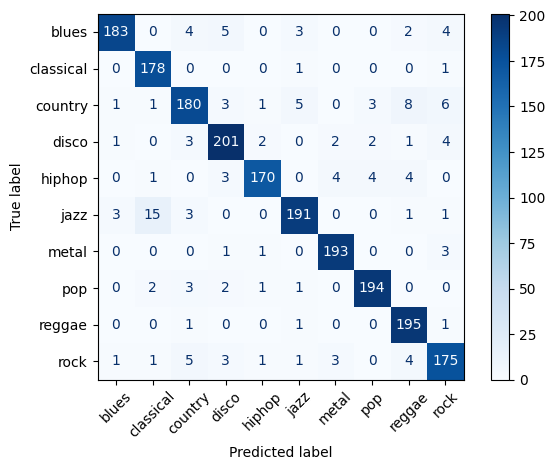

In [ ]:
# Evaluate on test set
y_pred = model_KNN.predict(X_test)

print("\nTest set score: {:.3f}\n".format(model_KNN.score(X_test, y_test)))
print(classification_report(y_test, y_pred, target_names=converter.classes_, zero_division=0.0))

# generate confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=converter.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.tight_layout()
plt.show()

## Using Neural Networks

In [ ]:
model_DNN=tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(X.shape[1],)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(512,activation='relu'),
    keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Dense(10,activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model_DNN.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 57)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 57)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │        29,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 204,586 (799.16 KB)

 Trainable params: 204,586 (799.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile
model_DNN.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', # loss for multi-class classification
    metrics=['acc']
)

# Create an early stopping callback
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=15, min_delta=0)

# Train the model
hist = model_DNN.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=128,
    verbose=1,
    callbacks=[es]
)

Epoch 1/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - acc: 0.1730 - loss: 2.1791 - val_acc: 0.4453 - val_loss: 1.5551
Epoch 2/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.3945 - loss: 1.6608 - val_acc: 0.5572 - val_loss: 1.2415
Epoch 3/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.5087 - loss: 1.3964 - val_acc: 0.6560 - val_loss: 1.0546
Epoch 4/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.5517 - loss: 1.2839 - val_acc: 0.6961 - val_loss: 0.9489
Epoch 5/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.5884 - loss: 1.2043 - val_acc: 0.7054 - val_loss: 0.9000
Epoch 6/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.6144 - loss: 1.1433 - val_acc: 0.6992 - val_loss: 0.8817
Epoch 7/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.6288 - loss: 1.0991 - val_acc: 0.7442 - val_loss: 0.7841
Epoch 8/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - acc: 0.6481 - loss: 1.0485 - val_acc: 0.7267 - val_loss: 0.7774
Epoch 9/1000
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/

In [ ]:
test_loss,test_acc=model_DNN.evaluate(X_test,y_test,batch_size=128)
print("The test loss is ",test_loss)
print("The best accuracy is: ",test_acc*100)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - acc: 0.9157 - loss: 0.2878 
The test loss is  0.2766333520412445
The best accuracy is:  91.49149060249329


In [ ]:
def Validation_plot(history):
    print("Validation Accuracy",max(history.history["val_acc"]))
    pd.DataFrame(history.history).plot(figsize=(12,6))
    plt.show()

Validation Accuracy 0.9186992049217224


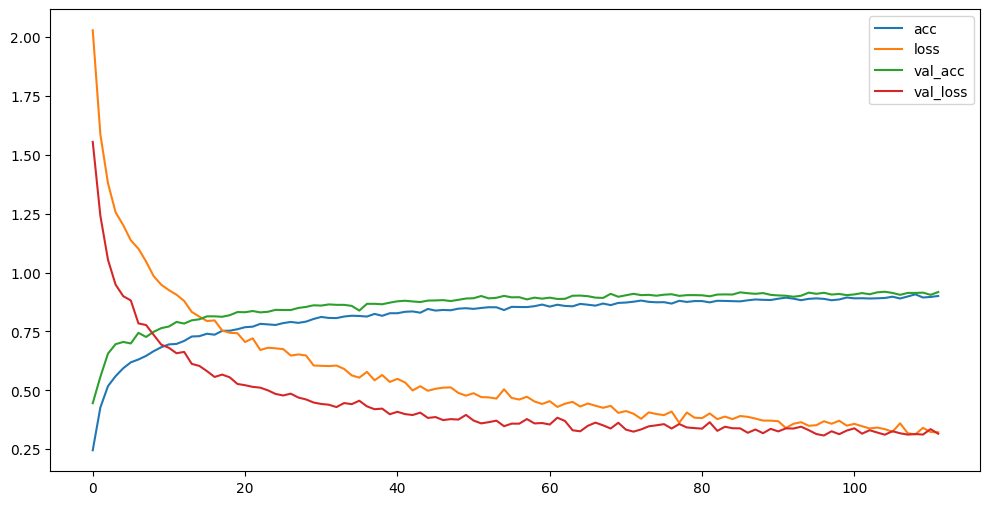

In [ ]:
# The plot dipicts how training and testing data performed
Validation_plot(hist)

In [ ]:
# testing
sample = X_test
sample = sample[np.newaxis, ...]
prediction = model_DNN.predict(X_test)
predicted_index = np.argmax(prediction, axis = 1)
print("Expected Index: {}, Predicted Index: {}".format(y_test, predicted_index))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Expected Index: [5 4 4 ... 6 5 0], Predicted Index: [5 4 4 ... 6 5 0]



Test set score: 0.915

              precision    recall  f1-score   support

       blues       0.96      0.95      0.96       201
   classical       0.85      0.98      0.91       180
     country       0.91      0.88      0.90       208
       disco       0.89      0.91      0.90       216
      hiphop       0.90      0.87      0.89       186
        jazz       0.94      0.91      0.92       214
       metal       0.92      0.96      0.94       198
         pop       0.94      0.88      0.91       203
      reggae       0.90      0.95      0.93       198
        rock       0.94      0.85      0.89       194

    accuracy                           0.91      1998
   macro avg       0.92      0.92      0.91      1998
weighted avg       0.92      0.91      0.91      1998



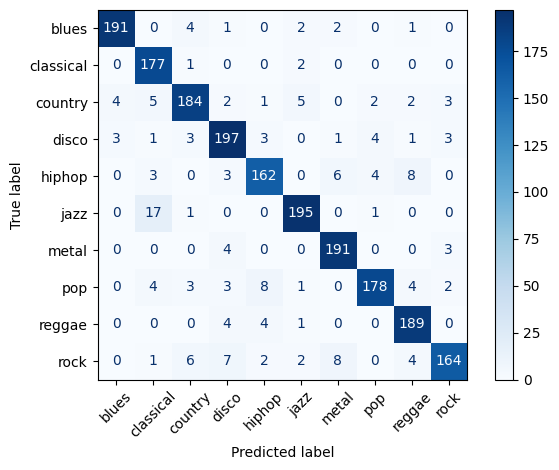

In [ ]:
# Plotting the confusion matrix for analizing the true positives and negatives
import seaborn as sn
import matplotlib.pyplot as plt

test_loss, test_acc = model_DNN.evaluate(X_test, y_test, verbose=0)
print("\nTest set score: {:.3f}\n".format(test_acc))

print(classification_report(y_test, predicted_index, target_names=converter.classes_, zero_division=0.0))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,predicted_index )
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=converter.classes_)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.tight_layout()
plt.show()

# Testing on bollywood songs

***Out-of-sample test 1***

In [ ]:
### Load Audio File
selected_audio = '/content/hare-krishna-relaxing-theme-4-114482.wav'
audio1, sr = librosa.load(selected_audio,sr=sr)
IPython.display.Audio(selected_audio)

In [ ]:
def get_audio_features(y, sr):
    features = {
        'chroma_stft_mean': np.mean(librosa.feature.chroma_stft(y=y, sr=sr)),
        'chroma_stft_var': np.var(librosa.feature.chroma_stft(y=y, sr=sr)),
        'rms_mean': np.mean(librosa.feature.rms(y=y)),
        'rms_var': np.var(librosa.feature.rms(y=y)),
        'spectral_centroid_mean': np.mean(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'spectral_centroid_var': np.var(librosa.feature.spectral_centroid(y=y, sr=sr)),
        'spectral_bandwidth_mean': np.mean(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'spectral_bandwidth_var': np.var(librosa.feature.spectral_bandwidth(y=y, sr=sr)),
        'rolloff_mean': np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'rolloff_var': np.var(librosa.feature.spectral_rolloff(y=y, sr=sr)),
        'zero_crossing_rate_mean': np.mean(librosa.feature.zero_crossing_rate(y=y)),
        'zero_crossing_rate_var': np.var(librosa.feature.zero_crossing_rate(y=y)),
        'harmony_mean': np.mean(librosa.effects.harmonic(y)),
        'harmony_var': np.var(librosa.effects.harmonic(y)),
        'perceptr_mean': np.mean(librosa.feature.spectral_contrast(y=y, sr=sr)),
        'perceptr_var': np.var(librosa.feature.spectral_contrast(y=y, sr=sr)),
        'tempo': librosa.beat.beat_track(y=y, sr=sr)[0][0],
    }

    # loop for mfcc feature:
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    for i in range(20):
        features[f'mfcc{i+1}_mean'] = np.mean(mfcc[i])
        features[f'mfcc{i+1}_var'] = np.var(mfcc[i])

    return features

In [ ]:
audio1_feature = get_audio_features(audio1, sr)

In [ ]:
audio1_df = pd.DataFrame([audio1_feature])
audio1_df

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.19172,0.091644,0.074022,0.001419,1451.389837,64424.440188,1759.805811,35810.903607,2908.915744,379656.816854,...,-7.987397,205.262604,-0.662135,107.125771,-4.645006,92.639206,-10.782783,152.845703,0.008497,129.967743


In [ ]:
audio1_df = fit.transform(audio1_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# predict genre using Deep Neural Network classifier
pred_label = model_DNN.predict(audio1_df)

# Extract the predicted class index
predicted_class = np.argmax(pred_label, axis=1)

print(predicted_class)

converter.classes_[predicted_class][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[3]


'disco'

In [ ]:
# predict genre using KNN classifier
pred_label = model_KNN.predict(audio1_df)
converter.classes_[pred_label][0]

'blues'



---

***Out-of-sample test 2***

In [ ]:
### Load Audio File
selected_audio = '/content/128-Shauq - Qala 128 Kbps.wav'
audio2, sr = librosa.load(selected_audio,sr=sr)
IPython.display.Audio(selected_audio)

In [ ]:
audio2_feature = get_audio_features(audio2, sr)

In [ ]:
audio2_df = pd.DataFrame([audio2_feature])
audio2_df

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.254285,0.088163,0.146758,0.006451,1386.175135,321143.854764,1841.190001,313563.768868,2704.92531,2.118161e+06,...,-1.390133,73.410378,0.575787,105.369507,3.487598,113.296684,-2.124259,100.117218,-3.223452,115.246552


In [ ]:
audio2_df = fit.transform(audio2_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# predict genre using Deep Neural Network classifier
pred_label = model_DNN.predict(audio2_df)

# Extract the predicted class index
predicted_class = np.argmax(pred_label, axis=1)

print(predicted_class)

converter.classes_[predicted_class][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[3]


'disco'

In [ ]:
# predict genre using KNN classifier
pred_label = model_KNN.predict(audio2_df)
converter.classes_[pred_label][0]

'reggae'

---

***Out-of-sample test 3***

In [ ]:
### Load Audio File
selected_audio = '/content/128-Laal Pari - Housefull 5 128 Kbps.wav'
audio3, sr = librosa.load(selected_audio,sr=sr)
IPython.display.Audio(selected_audio)

In [ ]:
audio3_feature = get_audio_features(audio3, sr)

In [ ]:
audio3_df = pd.DataFrame([audio3_feature])
audio3_df

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.308936,0.097455,0.271248,0.012695,2585.455064,701636.874299,2634.038775,255995.937394,5522.34994,3.797901e+06,...,14.351812,111.190331,9.333728,149.457123,8.654778,111.99707,-2.187145,88.104645,-1.400885,81.004654


In [ ]:
audio3_df = fit.transform(audio3_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [ ]:
# predict genre using Deep Neural Network classifier
pred_label = model_DNN.predict(audio3_df)

# Extract the predicted class index
predicted_class = np.argmax(pred_label, axis=1)

print(predicted_class)

converter.classes_[predicted_class][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
[3]


'disco'

In [ ]:
# predict genre using KNN classifier
pred_label = model_KNN.predict(audio3_df)
converter.classes_[pred_label][0]

'hiphop'